# Get Mag Evolution Model

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>
path: /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table, vstack
from astropy.io.fits import getdata

import pandas as pd

import esutil

In [2]:
import h5py
import glob

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def get_bins(xbins,x):
    indices = []
    xmed    = 0.5*(xbins[1:]+xbins[:-1])
    for xl,xh in zip(xbins[:-1],zbins[1:]):
        w, = np.where((x>=xl)&(x<=xh))
        indices.append(w)
    return indices, xmed

In [4]:
def get_percentile(x,y,xbins,alpha=10):
    keys, xmed = get_bins(xbins,x)
    xmean = np.array([np.median(y[ix]) for ix in keys])
    xup = np.array([np.percentile(y[ix],100-alpha) for ix in keys])
    xlo = np.array([np.percentile(y[ix],alpha) for ix in keys])
    return xmed, xmean, xup, xlo

In [9]:
## RedMaPPer Members

In [11]:
path   = '/data/des81.b/data/mariaeli/y3_cats/subsampled/'
fname  = path+'y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled.h5'

master = h5py.File(fname,'r')

clusters = master['catalog/redmapper/lgt5/']
zcls = clusters['z_lambda'][:]
mmag    = clusters['members/model_mag'][:]
zgal    = clusters['members/z'][:]


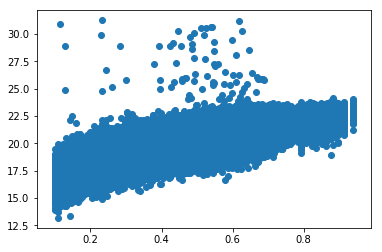

In [14]:
plt.scatter(zgal,mmag[:,2])

# Char. Mag

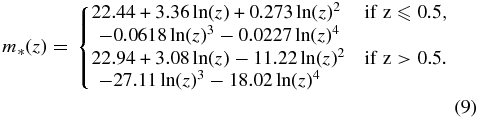

In [91]:
def rm_char_luminosity(z):
    lnz  = np.log(z)
    res0 = 22.44+3.35*lnz+0.273*lnz**2-0.0618*lnz**3-0.0227*lnz**4
    res1 = 22.94+3.08*lnz-11.22*lnz**2-27.11*lnz**3-18.02*lnz**4
    res = np.where(z>0.5,res1,res0)
    return res

In [117]:
Z1 = [ 2.85703803, 23.35451485]
Z2 = [ -0.13290108,   1.11453393,  -3.74351207,   6.96351527, -10.04310863,  12.60755443,  -7.85820367,   0.92175766]
def char_luminosity(z):
    return np.poly1d(Z1)(np.log(z)) + np.poly1d(Z2)(z)

In [118]:
zbins = np.linspace(0.1,0.65,51)
zmed, mr_mean, mr_up, mr_lo = get_percentile(zgal,mmag[:,2],zbins,
                                             alpha=0.1)

Text(0.5,1,'DES Y3 - Gold 2 2')

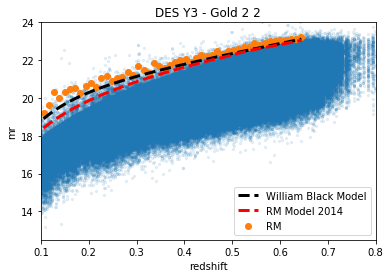

In [119]:
plt.scatter(zgal,mmag[:,2],alpha=0.1,s=5,)
plt.scatter(zmed,mr_up,label='RM')
plt.plot(zmed,char_luminosity(zmed)+1.75,'k--',lw=3,label='William Black Model')
plt.plot(zmed,rm_char_luminosity(zmed)+2.00,'r--',lw=3,label='RM Model 2014')
rm_char_luminosity
plt.ylim(12.5,24.)
plt.ylabel('mr')
plt.xlabel('redshift')
plt.xlim(0.1,0.8)
plt.legend()
plt.title('DES Y3 - Gold 2 2')

In [120]:
np.interp(0.65,zmed,mr_up)

23.204190732956

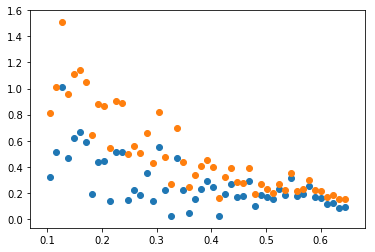

In [122]:
plt.scatter(zmed,mr_up-(char_luminosity(zmed)+1.75))
plt.scatter(zmed,mr_up-(rm_char_luminosity(zmed)+2.0))

In [123]:
char_luminosity(0.65)+1.75

23.142496590190532